# Datos Faltantes: 

La imputación de atributos faltantes mediante criterios sencillos como la moda o la media deteriora significativamente el desempeño de un clasificador y con frecuencia arroja peores resultados que eliminar esos ejemplos, siempre y cuando no se trate de la mayoría.

# Clasificasión de datos faltantes


Primera clasificación formal estadisticamente de los tipos de datos faltantes: [1]


* MCAR (Missing Completely at Random): Refiere a la condición de que la probabilidad de una observación faltante no tiene relación con otras catareisticas del modelo ni de los demas valores medidos de su propia caracteristica. En este caso se presume que la falta de información no proviene de ningún patrón ni falla en particular, para modelos sencillos se puede verificar fácilmente cuando el rendimiento del modelo con o sin eliminación de filas no difere demasiado, en modelos más complejos no es es detectable ya que se elimina demasiada información.


* MAR (Missing At Random): Refiere a la condición de que la probabilidad de una observación faltante puede explicarse por otras catareisticas del modelo y no de las demas observaciones de su propia caracteristica. Las distribuciones para los datos con y sin faltantes difieren.


* NMAR (Not Missing At Random): Refiere a la condición de que la probabilidad de una observación faltante no puede explicarse por otras catareisticas del modelo pero si de las demas observaciones de su propia caracteristica. Cuando las condiciones MAR no se cumplen. En otras palabras, NMAR ocurre cuando, después de considerar todos los datos observados, la probabilidad de que falte un valor todavía depende del valor a clasificar. Al igual que MAR las distribuciones para los datos con y sin faltantes difieren.

 De hecho, no existen procedimientos estadísticos que puedan distinguir entre MAR en general y NMAR. Si hay evidencia de MCAR, entonces uno puede tener más confianza para descartar NMAR, y ha habido esfuerzos recientes para establecer procedimientos para probar algunos casos especiales de MAR. Sin embargo, para muchos problemas de datos reales, uno debe confiar en el razonamiento, los juicios y tal vez en algunas conjeturas para decidir si los datos son MAR o NMAR.

In [1]:
#Dataset utilizados y librerias

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np


from random import seed
from random import randint

# compare statistical imputation strategies
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import accuracy_score

import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.linear_model import Ridge


from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score

import missingno as msno 

# Entrenamiento del modelo sin datos faltantes
Para realizar la comparativa de cuán problemáotico es estimar datos faltantes con alguna técnica de imputación simple como lo son la media, mediana, la moda, o alguna constante. Nos enfocaremos en analizar como varía el score del modelo en las distintas situaciones.

In [27]:
#Para probar con otros dataframe ingresar nombres: wine o iris

dataframe="cancer"

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
    
data = df.values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X, y = data[:, ix], data[:, df.shape[1]-1]

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=cv, n_jobs=-1)

mean(scores)

0.9426274018379281

## ¿Por qué no es conveniente eliminar datos?

A continuación, se expone visualmente cómo es que abordar el problema de valores perdidos eliminando las filas que contengan datos faltantes, nos hace propensos a fácilmente eliminar una gran parte de la data.
Se muestra el Dataframe completamente negro si no existen datos perdidos, mientras que para cada valor marcado con "NaN" en el dataframe se representa de color blanco

<AxesSubplot:>

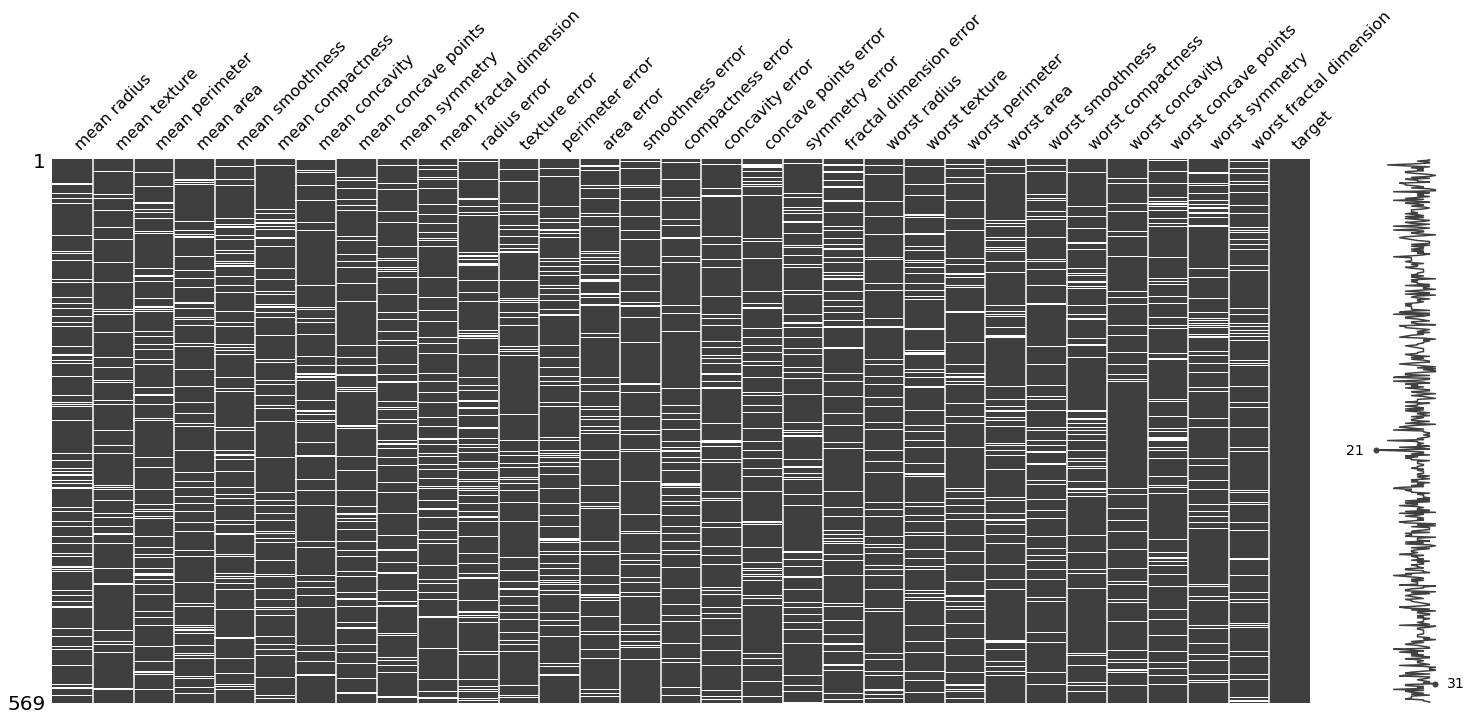

In [2]:
#Para probar con otros dataframe ingresar nombres: wine o iris

dataframe="cancer"
porcentaje_na_values= 0.1

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

    # genero distintos porcentajes de Nan values
for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
    df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan

msno.matrix(df)

## Mapa de calor

Se grafican los correlaciones (n) de los datos faltantes entre pares de columnas como sigue:

* si n es cercano a 0, no hay dependencia entre la presencia de un dato (no nulo) en la columa i, dado que hay un dato (no nulo) en la columa j

* si n es cercano a 1, hay alta dependencia de que dado que hay un dato (no nulo) en la columna i, también haya un dato (no nulo) en la columna j

* si n es cercano a -1, hay alta dependencia de que dado que hay un dato (no nulo) en la columna i, haya un dato faltante en la columna j 

<AxesSubplot:>

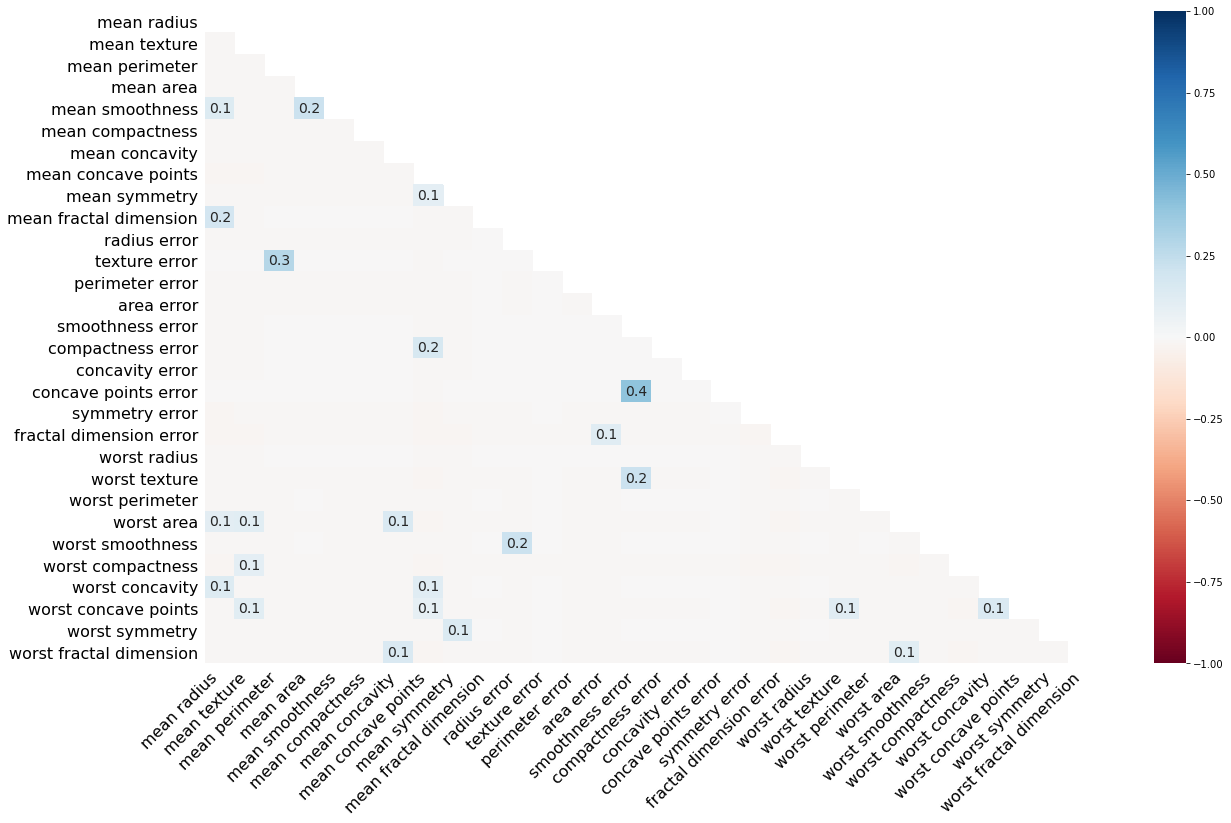

In [3]:
#Para probar con otros dataframe ingresar nombres: wine o iris

dataframe="cancer"
porcentaje_na_values= 0.01

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
    df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan
    
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df) 

## Gráfico de barras

Muestra la cantidad de datos faltantes por cada columna.


<AxesSubplot:>

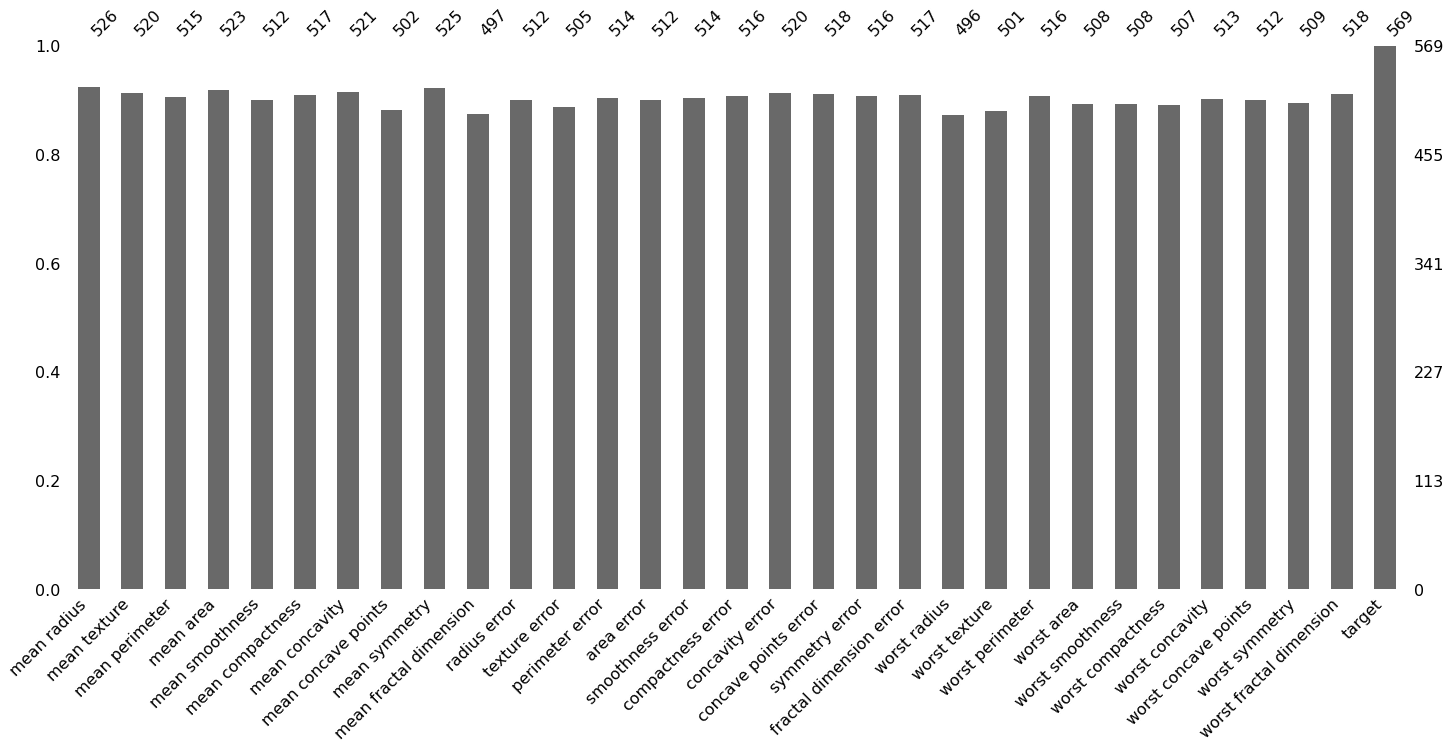

In [4]:
#Para probar con otros dataframe ingresar nombres: wine o iris

dataframe="cancer"
porcentaje_na_values= 0.1

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
    df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan
    
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.bar(df) 

## ¿Cúanto porcentaje del total de datos se espera perder si se eliminan las filas con valores nulos? 

Para responder a esta pregunta, repetimos con semillas aleatorias el proceso de marcar casillas como valores "NaN", para finalmente promediar cuanto es el porcentaje de pérdida de información cuando eliminamos las filas que contengan valores nulos

In [14]:
#Para probar con otros dataframes

dataframe="cancer"
lista=[]
porcentaje_na_values=0.15  #Del total de datos cuanto es el porcentaje de valores nulos que tenemos
numero_de_repeticiones=10 #Cuantas veces repetimos el proceso de generar valores nulos aleatoriamente


if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

# genero distintos porcentajes de Nan values
for i in range(10):

    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                      columns= np.append(dataframe['feature_names'], ['target']))


    cancer = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                      columns= np.append(dataframe['feature_names'], ['target']))

        # genero distintos porcentajes de Nan values
    for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
        df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan
        df_copia=df
        
    filas= (df.shape[0]-df.dropna().shape[0])*(df.shape[1])
    total=(df.shape[1])*df.shape[0]
    resultado= (filas*100)/(total)
    lista.append(resultado)

print(mean(lista))

99.26186291739894


In [13]:
resultLWD=[]

In [17]:
from sklearn.metrics import accuracy_score

#Para probar con otros dataframe ingresar nombres: wine o iris

dataframe="cancer"
porcentaje_na_values=0.2
seed(0)

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

data = df.values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X_test, y_test = data[:, ix], data[:, df.shape[1]-1]

for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
    df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan


df=df.dropna()

data = df.values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X_train, y_train = data[:, ix], data[:, df.shape[1]-1]

model=LogisticRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)

resultLWD.append(accuracy_score(y_test, y_pred))



ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0

In [19]:
resultLWD

[0.9437609841827768, 0.8927943760984183, 0.8734622144112478]

## Scores para distintos métodos de imputación simples

Se seleccionan los dataset *breast_cancer, wine, iris* de la librería *sklearn*. Y para cada uno de estos se realizan pruebas de rendimiento a través de la estrategia de *cross_validation*, para distintos porcentajes de datos perdidos, que van desde el 5% hasta el 35% del total de la data. Los métodos de imputación simples utilizados son media, mediana, moda y reemplazar por una constante.

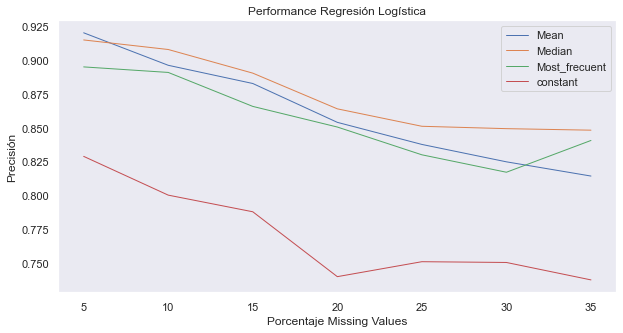

In [20]:
#dataframe= cancer, wine, iris
dataframe="cancer"

df_scores= pd.DataFrame(columns=['Porcentaje','Mean','Median','Most_frecuent','constant'])
porcentajes= [0.05, 0.1 , 0.15, 0.2, 0.25, 0.3, 0.35]
seed(0)

results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
c=0

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe= load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

# evaluate each strategy on the dataset
for j in porcentajes:
    results_2=[j*100]
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                      columns= np.append(dataframe['feature_names'], ['target']))

    # genero distintos porcentajes de Nan values
    for i in range(int(df.shape[0]*df.shape[1]*j)):
        df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan


    # split into input and output elements
    data = df.values
    ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
    X, y = data[:, ix], data[:, df.shape[1]-1]

    for s in strategies:
        # create the modeling pipeline
        pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', LogisticRegression())])
        # evaluate the model
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        # store results
        results.append(scores)
        results_2.append(mean(scores))

    df_scores.loc[c]= results_2
    c+=1




In [27]:
df_scores

,Porcentaje,Mean,Median,Most_frecuent,constant,LWD
0,5.0,0.920384,0.915100,0.895155,0.828937,0.943761
1,10.0,0.896345,0.908030,0.891061,0.800261,0.892794
2,15.0,0.882874,0.890539,0.865925,0.787949,0.873462
3,20.0,0.854125,0.864119,0.850658,0.739933,0.000000
4,25.0,0.837782,0.851211,0.830107,0.751003,0.000000
5,30.0,0.824906,0.849457,0.817199,0.750428,0.000000
6,35.0,0.814380,0.848329,0.840716,0.737531,0.000000


In [33]:
df_scores['LWD'] = resultLWD +[np.nan,np.nan,np.nan,np.nan]

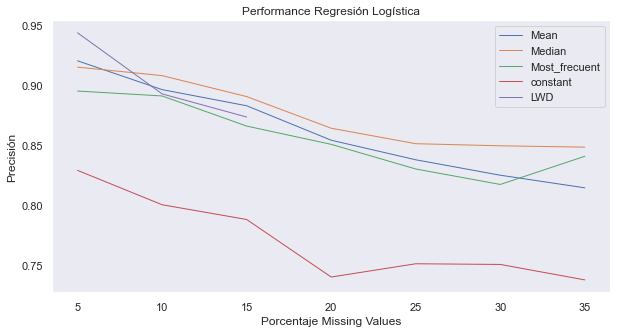

In [34]:
#Gráfica de Scores de cada técnica de imputación vs el porcentaje de Missing values

sns.set(rc={'figure.figsize':(20,16)})

# tamano del grafico
fig = plt.figure(figsize=(10, 5)) 
for i in range(1,6):
    plt.plot(
    df_scores['Porcentaje'],# eje x
    df_scores.iloc[:,i], # eje y
    label=df_scores.columns[i], # etiquetado
    linewidth=1 # tamano de la curva
    )

plt.legend() # agregar etiquetado
plt.title("Performance Regresión Logística") # agregar titulo
plt.xlabel("Porcentaje Missing Values") # nombre eje x
plt.ylabel("Precisión") # nombre eje y
plt.grid() # agregar grillado
plt.show() # mostrar grafico

***Observaciones:***  Los métodos de imputación simples, representan curvas mas suaves, por lo que pequeños cambios en el pocentaje de data faltante, representan pequeños cambios en el score del modelo. Esto se traduce en una mayor confiabilidad, ya que es esperable, tener una mejor técnica la mayor parte del tiempo. Cómo se ve en el gráfico, la mediana es la técnica de imputación que tiene mejor comportamiento en casi todo momento, esto se debe a la robustez de ésta medida de tendencia central. 



## Scores para otros métodos de imputación

Cómo metodos de imputación mas elavorados, consideramos "Lineallasso", "LinealRidgge","distance", dónde este último es un criterio de la técnica "vecinos más cercanos".

In [35]:
#Para probar con otros dataframe ingresar nombres: wine o iris

dataframe="cancer"
porcentajes= [0.05, 0.1 , 0.15, 0.2, 0.25, 0.3, 0.35]
seed(0)

results = list()
strategies_2 = ['Lineallasso','LinealRidgge','distance']
df_scores_2= pd.DataFrame(columns=['Porcentajes', 'Lasso','Ridge','KNN'])
c=0

if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
'''
else:
    dataframe=pd.read_csv("weatherAUS.csv")
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
'''
for j in porcentajes:
    results_3=[j*100]
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
    # genero distintos porcentajes de Nan values
    for i in range(int(df.shape[0]*df.shape[1]*j)):
        df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan
    
        
    # compare statistical imputation strategies for the horse colic dataset

    # split into input and output elements
    data = df.values
    ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
    X, y = data[:, ix], data[:, df.shape[1]-1]

    # evaluate each strategy on the dataset
    
    for s in strategies_2:
        if s=="Lineallasso":
            pipeline = Pipeline(steps=[('i',IterativeImputer(estimator=linear_model.Lasso(alpha=0.1),max_iter=10, random_state=0)), ('m', LogisticRegression())])
        if s=="LinealRidgge":
            pipeline = Pipeline(steps=[('i',IterativeImputer(estimator= Ridge(alpha=0.1), max_iter=10, random_state=0)), ('m', LogisticRegression())])
        if s=='distance':
            pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=6, weights=s)), ('m', LogisticRegression())])
        # evaluate the model
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
            # store results
        results.append(scores)
        results_3.append(mean(scores))
    df_scores_2.loc[c]= results_3
    c+=1




In [37]:
df_scores_2['LWD'] = resultLWD +[np.nan,np.nan,np.nan,np.nan]

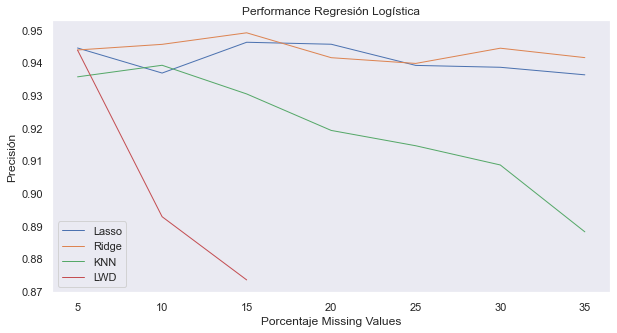

In [38]:
#Gráfica de Scores de cada técnica de imputación vs el porcentaje de Missing values

sns.set(rc={'figure.figsize':(10,8)})

# tamano del grafico
fig = plt.figure(figsize=(10, 5)) 
for i in range(1,5):
    plt.plot(
    df_scores_2['Porcentajes'],# eje x
    df_scores_2.iloc[:,i], # eje y
    label=df_scores_2.columns[i], # etiquetado
    linewidth=1 # tamano de la curva
    )
    
plt.legend() # agregar etiquetado
plt.title("Performance Regresión Logística") # agregar titulo
plt.xlabel("Porcentaje Missing Values") # nombre eje x
plt.ylabel("Precisión") # nombre eje y
plt.grid() # agregar grillado
plt.show() # mostrar grafico

***Observaciones:*** Notemos que dependiendo del porcentaje de datos faltantes, podemos obtener mejores o peores resultados dependiendo del modelo, es decir, no hay un mejor modelo en toda situacion. 

Matemáticamente podemos ver este comportamiento como una nueva función $f(x)$ que se comporta de la siguiente manera $$f(x)=\sup_{\alpha \in \Lambda}f_{\alpha}(x) \qquad \forall x \in X$$

Dónde $f_{\alpha}:X \to \mathbb{R}$ son las familias de funciones, que en nuestro caso representan los scores de los distintos modelos para cada porcentaje de datos faltantes. La función f, punto a punto escoge entre la función que obtenga un el mayor score, de esta forma, se puede seleccionar el mejor modelo para cierta cantidad de datos faltantes.

## Graficando la curva roc para cada estrategia

In [5]:
dataframe="cancer"
porcentaje_na_values=0.1
c=0


if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
# evaluate each strategy on the dataset
strategies = ['mean', 'median', 'most_frequent', 'constant']


    # genero distintos porcentajes de Nan values
for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
    df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan
        
    # split into input and output elements
data = df.values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X, y = data[:, ix], data[:, df.shape[1]-1]
    
    
for s in strategies:
    X, y = data[:, ix], data[:, df.shape[1]-1]
        # create the modeling pipeline
    imp=SimpleImputer(strategy=s)
    imp.fit(X)
    X = imp.transform(X)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]  
            
    model= LogisticRegression()
    model.fit(X_train,y_train)
    proba = model.predict_proba(X_test)
        
    if s=="mean":
        proba = proba[:, 1]
        mean_auc = roc_auc_score(y_test, proba)
        mean1, mean2, _= roc_curve(y_test, proba)
        print("AUROC", s , mean_auc)
            
    if s=="median":
        proba = proba[:, 1]
        median_auc = roc_auc_score(y_test, proba)
        median1, median2, _= roc_curve(y_test, proba)
        print("AUROC", s , median_auc)
            
    if s=="most_frequent":
        proba = proba[:, 1]
        moda_auc = roc_auc_score(y_test, proba) 
        moda1, moda2, _= roc_curve(y_test, proba)
        print("AUROC", s , moda_auc)
            
    if s=="constant":
        proba = proba[:, 1]
        cons_auc = roc_auc_score(y_test, proba)              
        cons1, cons2, _= roc_curve(y_test, proba)
        print("AUROC", s , cons_auc)

### CURVA LINEALLASSO        
X, y = data[:, ix], data[:, df.shape[1]-1]
    # create the modeling pipeline
imp=IterativeImputer(estimator=linear_model.Lasso(alpha=0.1),max_iter=10, random_state=0)
imp.fit(X)
X = imp.transform(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
            
model= LogisticRegression()
model.fit(X_train,y_train)
proba = model.predict_proba(X_test)        


proba = proba[:, 1]
lasso_auc = roc_auc_score(y_test, proba)              
lasso1, lasso2, _= roc_curve(y_test, proba)
print("AUROC", 'Lineallasso' , lasso_auc)


### CURVA LINEALRIDGE        
X, y = data[:, ix], data[:, df.shape[1]-1]
    # create the modeling pipeline
imp=IterativeImputer(estimator= Ridge(alpha=0.1), max_iter=10, random_state=0)
imp.fit(X)
X = imp.transform(X)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
            
model= LogisticRegression()
model.fit(X_train,y_train)
proba = model.predict_proba(X_test)        


proba = proba[:, 1]
ridgge_auc = roc_auc_score(y_test, proba)              
ridgge1, ridgge2, _= roc_curve(y_test, proba)
print("AUROC", 'LinealRidgge' , ridgge_auc)


### CURVA DISTANCE        
X, y = data[:, ix], data[:, df.shape[1]-1]
    # create the modeling pipeline
imp=KNNImputer(n_neighbors=6, weights='distance')
imp.fit(X)
X = imp.transform(X)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]  
            
model= LogisticRegression()
model.fit(X_train,y_train)
proba = model.predict_proba(X_test)        


proba = proba[:, 1]
dist_auc = roc_auc_score(y_test, proba)              
dist1, dist2, _= roc_curve(y_test, proba)
print("AUROC", 'distance' , dist_auc)


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

AUROC mean 0.963265306122449
AUROC median 0.910204081632653
AUROC most_frequent 0.8761904761904763
AUROC constant 0.782312925170068


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189571.078053838, tolerance: 6454.85031753077
  positive)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127607.61942608334, tolerance: 16566.80746499219
  positive)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2444249876762115, tolerance: 1.9495643957058824
  positive)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167682.47545566148, tolerance: 16566.80746499219
  positive)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.286009094757446, tolerance: 0.9430240846274508
  positive)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.156236155384022, tolerance: 1.9495643957058824
  positive)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mi

AUROC Lineallasso 0.9945578231292517
AUROC LinealRidgge 0.9972789115646259
AUROC distance 0.988933601609658


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\impute\_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale th

In [75]:
X.shape

(569, 30)

In [32]:
X_test.shape

(113, 30)

In [6]:
seed(0)
dataframe="cancer"
porcentaje_na_values=0.1
c=0


if dataframe=="cancer":
    dataframe = load_breast_cancer()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
    df_copia= df.copy()
    
elif dataframe == "wine":
    dataframe = load_wine()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))

else:
    dataframe = load_iris()
    df = pd.DataFrame(np.c_[dataframe['data'], dataframe['target']],
                  columns= np.append(dataframe['feature_names'], ['target']))
# evaluate each strategy on the dataset

    # genero distintos porcentajes de Nan values
for i in range(int(df.shape[0]*df.shape[1]*porcentaje_na_values)):
    df.iloc[randint(0,df.shape[0]-1),randint(0,df.shape[1]-2)]= np.nan

conj=set()
for i in range(df.shape[0]):
    for columnas in df.columns:
        if df[columnas].isnull()[i]==True:
            conj.add(i)  


df_2= df_copia.iloc[list(conj),:]
data = df_2.values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X_test, y_test = data[:, ix], data[:, df.shape[1]-1]  
 

    # split into input and output elements
data = df.dropna().values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X, y = data[:, ix], data[:, df.shape[1]-1]
  
            
model= LogisticRegression()
model.fit(X,y)
proba = model.predict_proba(X_test)
pred = model.predict(X_test)

proba = proba[:, 1]
delete_auc = roc_auc_score(y_test, proba)
delete1, delete2, _= roc_curve(y_test, proba)
print("AUROC", delete_auc)
print("Acuracy",accuracy_score(y_test,pred))

AUROC 0.952754662840746
Acuracy 0.8880733944954129


C:\Users\Mario\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
X.shape

(122, 30)

In [43]:
X_test.shape

(447, 30)

<AxesSubplot:>

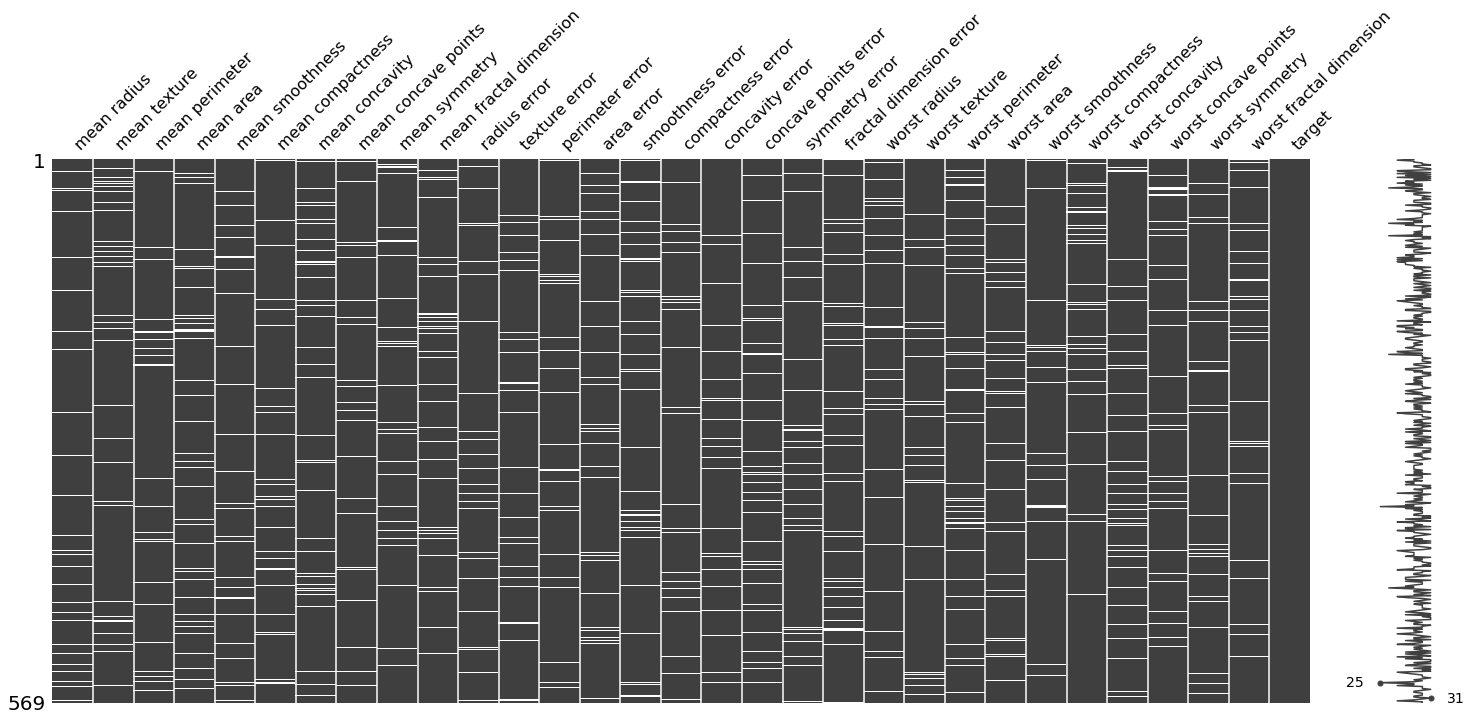

In [53]:
msno.matrix(df)

In [78]:
df_2= df.iloc[list(conj),:]
data = df_2.values
ix = [i for i in range(data.shape[1]) if i != df.shape[1]-1]
X_test, y_test = data[:, ix], data[:, df.shape[1]-1]    

In [80]:
X_test.shape

(453, 30)

In [44]:
proba

array([4.14899504e-30, 1.19311748e-14, 5.44750378e-13, 7.42527211e-01,
       7.42619807e-08, 3.55632526e-02, 1.09436207e-11, 4.02193773e-05,
       2.82434003e-01, 2.09240732e-03, 2.11525134e-06, 9.67726847e-11,
       1.04498018e-07, 9.97773080e-01, 9.94683572e-01, 1.32350893e-04,
       3.49795720e-09, 3.87150255e-10, 5.58583634e-31, 9.97960488e-01,
       9.99967192e-01, 9.99992863e-01, 2.00670163e-02, 2.03754266e-31,
       2.79908178e-33, 3.36206290e-15, 1.64978808e-02, 1.42956786e-09,
       3.73462114e-12, 2.21437448e-04, 1.23056533e-17, 1.02197746e-09,
       1.04131557e-09, 2.63287670e-14, 7.78378895e-07, 6.93859763e-06,
       4.03363357e-01, 9.99999651e-01, 1.34540279e-01, 9.67059402e-01,
       2.17114356e-01, 2.58637312e-01, 2.35477872e-17, 8.10313413e-05,
       6.44930304e-01, 5.43838220e-10, 9.99919362e-01, 1.68749188e-01,
       9.97537530e-01, 9.56533459e-01, 9.98294722e-01, 9.99931934e-01,
       9.99949613e-01, 1.47849358e-08, 2.48814912e-04, 9.99504580e-01,
      

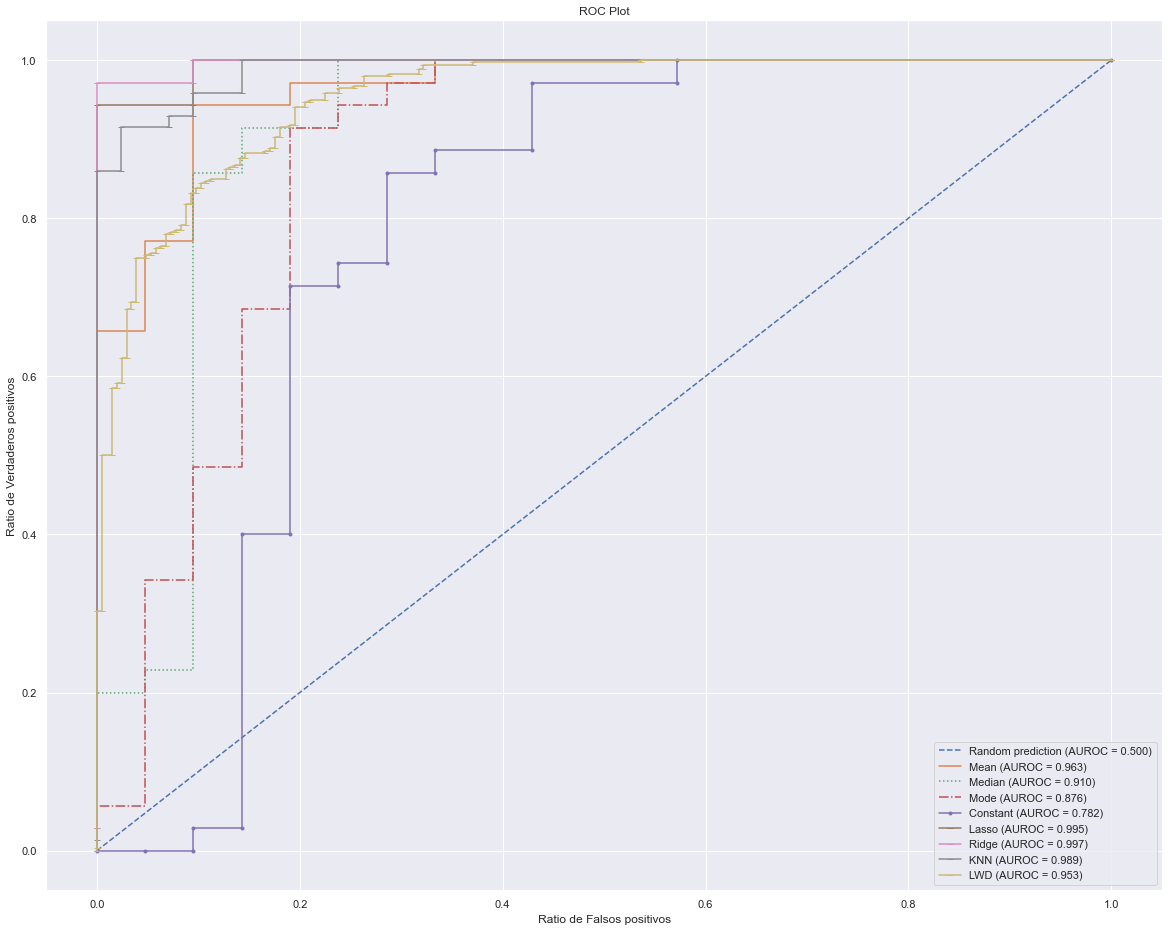

In [16]:
r_probs = [0 for _ in range(len(y_test))]
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
r_auc = roc_auc_score(y_test, r_probs) 


plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(mean1, mean2, linestyle='-', label='Mean (AUROC = %0.3f)' % mean_auc)
plt.plot(median1, median2, linestyle=':', label='Median (AUROC = %0.3f)' % median_auc)
plt.plot(moda1, moda2, linestyle='-.', label='Mode (AUROC = %0.3f)' % moda_auc)
plt.plot(cons1, cons2, marker='.', label='Constant (AUROC = %0.3f)' % cons_auc)
plt.plot(lasso1, lasso2, marker='_', label='Lasso (AUROC = %0.3f)' % lasso_auc)
plt.plot(ridgge1, ridgge2, marker='_', label='Ridge (AUROC = %0.3f)' % ridgge_auc)
plt.plot(dist1, dist2, marker='_', label='KNN (AUROC = %0.3f)' % dist_auc)
plt.plot(delete1, delete2, marker='_', label='LWD (AUROC = %0.3f)' % delete_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('Ratio de Falsos positivos')
plt.ylabel('Ratio de Verdaderos positivos')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Bibliografía

[1]. Rubin, D. B. (1976). Inference and missing data. Biometrika, 63, 581–592. 